# <font color='blue'> Ciclo-1 end to end </font>

## 1.0 Data Informations

### 1.1 IMPORTS

In [1]:
import random


import numpy            as np
import pandas           as pd
import matplotlib       as plt




from      scikitplot   import              metrics                  as     mt
from      sklearn      import              metrics                  as     m
from      sklearn      import              preprocessing            as     pp
from      keras        import              layers                   as     l
from      keras        import              models                   as     ml
from      sklearn      import              model_selection          as     ms

### 1.2 Helper functions

### 1.3 Loading data

In [2]:
data_raw    = pd.read_csv('dataset/training_users.csv', low_memory=True)

## 2.0 Data Description 

In [3]:
df1 = data_raw.copy()

In [4]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows: 213451
Number of columns: 16


### 2.1 Data Type

In [5]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

### 2.2 NA Check

In [6]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [7]:
df1 = df1.dropna()

### 2.3 Change data types

In [8]:
#date_account_created
df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )

#timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'] )

#date_first_booking
df1['date_first_booking'] = pd.to_datetime( df1['date_first_booking'] )

#age
df1['age'] = df1['age'].astype( int )

### 2.4 Check balanced data

In [9]:
df1['country_destination'].value_counts( normalize=True )

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

## 3.0 Data filtering

In [10]:
df2 = df1.copy()

### 3.1 Filtering rows

### 3.2 Columns selection

## 4.0 Data Preparation 

In [11]:
df3 = df2.copy()

In [12]:
#dummy variable
df3_dummy =   pd.get_dummies( df3.drop ( ['id','country_destination'] , axis=1 ) ) 

#join id and country destination
df3 = pd.concat( [df3 [['id','country_destination']] ,df3_dummy], axis=1 )

## 5.0 Feature Selection

In [13]:
cols_drop = ['date_account_created','timestamp_first_active','date_first_booking']
df4 = df3.drop( cols_drop, axis=1 )

In [14]:
X = df4.drop( 'country_destination', axis=1 )
y = df4['country_destination'].copy()

In [15]:
# split dataset into training and test
X_train, X_test,y_train, y_test =  ms.train_test_split( X , y, test_size=0.2, random_state=32 )

## 6.0 Machine Learning Model

In [16]:
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)

### 6.1 Baseline Model

In [17]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().tolist()
k_num = y_test.shape[0]
country_destination_weights = df1['country_destination'].value_counts(normalize=True).sort_index().tolist()
#Model
y_hat_random = random.choices( population=country_destination_list,
                              weights = country_destination_weights,
                              k=k_num)
len(y_hat_random)

13635

Accuracy :0.5204253758709204
Balanced accuracy : 0.09282595140143729
kappa score : 0.0020007162685130586
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.02      0.02      0.02       214
          DE       0.02      0.02      0.02       170
          ES       0.03      0.03      0.03       345
          FR       0.05      0.05      0.05       710
          GB       0.04      0.03      0.04       344
          IT       0.03      0.03      0.03       423
          NL       0.01      0.01      0.01       128
          PT       0.00      0.00      0.00        36
          US       0.71      0.71      0.71      9624
       other       0.11      0.12      0.12      1540

    accuracy                           0.52     13635
   macro avg       0.09      0.09      0.09     13635
weighted avg       0.52      0.52      0.52     13635



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

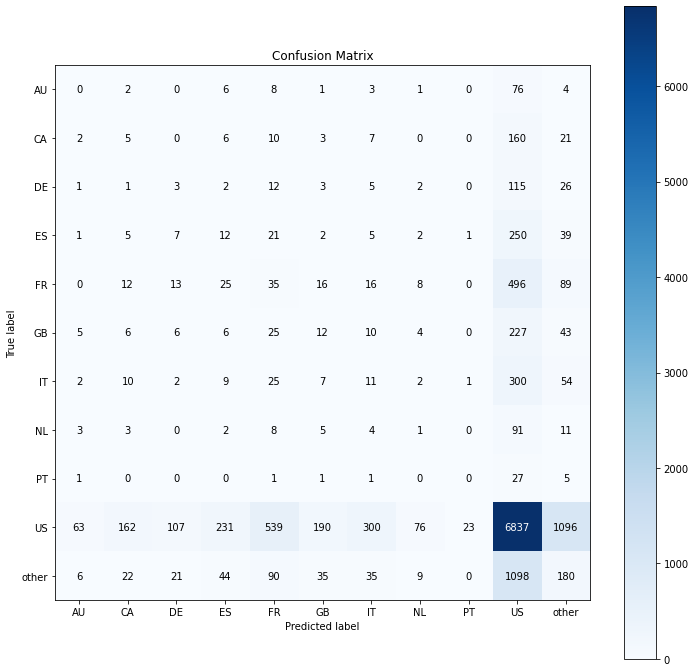

In [18]:
acc_random = m.accuracy_score( y_test, y_hat_random )
print('Accuracy :{}'.format(acc_random ) )

# Balanced accuracy
balanced_accuracy_random = m.balanced_accuracy_score(y_test, y_hat_random)
print('Balanced accuracy : {}'.format( balanced_accuracy_random ))


# Kappa Metrics
kappa_random = m.cohen_kappa_score(y_test, y_hat_random)
print('kappa score : {}'.format( kappa_random ))

# classification report
print(m.classification_report( y_test, y_hat_random ))

#Confusion Matrix 
mt.plot_confusion_matrix( y_test, y_hat_random, normalize=False , figsize=(12,12) )


### 6.1 Neural Network -MLP

In [19]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1,1)).toarray()

In [20]:
#model definition
model = ml.Sequential()
model.add( l.Dense( 128, input_dim= x_train.shape[1], activation='relu' ) )
model.add( l.Dense( 11, activation='softmax' ) )

#model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

#train model
model.fit( x_train, y_train_nn, epochs=100 )

Epoch 1/100
1705/1705 [==============================] - 2s 707us/step - loss: 1.3590 - accuracy: 0.7054
Epoch 2/100
1705/1705 [==============================] - 1s 782us/step - loss: 1.2270 - accuracy: 0.7086
Epoch 3/100
1705/1705 [==============================] - 1s 672us/step - loss: 1.2130 - accuracy: 0.7108
Epoch 4/100
1705/1705 [==============================] - 1s 665us/step - loss: 1.1823 - accuracy: 0.7146
Epoch 5/100
1705/1705 [==============================] - 1s 769us/step - loss: 1.1875 - accuracy: 0.7073
Epoch 6/100
1705/1705 [==============================] - 1s 686us/step - loss: 1.1822 - accuracy: 0.7075
Epoch 7/100
1705/1705 [==============================] - 1s 704us/step - loss: 1.1639 - accuracy: 0.7082
Epoch 8/100
1705/1705 [==============================] - 1s 794us/step - loss: 1.1564 - accuracy: 0.7101
Epoch 9/100
1705/1705 [==============================] - 2s 905us/step - loss: 1.1463 - accuracy: 0.7083
Epoch 10/100
1705/1705 [==============================]

1705/1705 [==============================] - 1s 718us/step - loss: 1.1044 - accuracy: 0.7108
Epoch 79/100
1705/1705 [==============================] - 1s 731us/step - loss: 1.1039 - accuracy: 0.7096
Epoch 80/100
1705/1705 [==============================] - 1s 726us/step - loss: 1.0940 - accuracy: 0.7119
Epoch 81/100
1705/1705 [==============================] - 1s 715us/step - loss: 1.1027 - accuracy: 0.7108
Epoch 82/100
1705/1705 [==============================] - 1s 722us/step - loss: 1.1027 - accuracy: 0.7103
Epoch 83/100
1705/1705 [==============================] - 1s 720us/step - loss: 1.0905 - accuracy: 0.7150
Epoch 84/100
1705/1705 [==============================] - 1s 743us/step - loss: 1.1000 - accuracy: 0.7109
Epoch 85/100
1705/1705 [==============================] - 1s 726us/step - loss: 1.0996 - accuracy: 0.7108
Epoch 86/100
1705/1705 [==============================] - 1s 727us/step - loss: 1.0959 - accuracy: 0.7129
Epoch 87/100
1705/1705 [==============================] - 1

### 6.1.2 NN Performance

In [21]:
#prediction
pred_nn = model.predict( x_test )

#invert prediction
y_hat_nn = ohe.inverse_transform( pred_nn )

#prediction prepare
y_test_nn = y_test.to_numpy()
y_hat_nn = y_hat_nn.reshape( 1 , -1)[0] 

Accuracy :0.7031903190319032
Balanced accuracy : 0.0915973290415215
kappa score : 0.0015937345194440011


/home/tulio/.pyenv/versions/3.8.0/envs/projetosportfolio/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tulio/.pyenv/versions/3.8.0/envs/projetosportfolio/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.00      0.00      0.00       214
          DE       1.00      0.01      0.01       170
          ES       0.00      0.00      0.00       345
          FR       0.00      0.00      0.00       710
          GB       0.00      0.00      0.00       344
          IT       0.25      0.00      0.00       423
          NL       0.00      0.00      0.00       128
          PT       0.00      0.00      0.00        36
          US       0.71      1.00      0.83      9624
       other       0.17      0.00      0.01      1540

    accuracy                           0.70     13635
   macro avg       0.19      0.09      0.08     13635
weighted avg       0.54      0.70      0.58     13635



/home/tulio/.pyenv/versions/3.8.0/envs/projetosportfolio/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

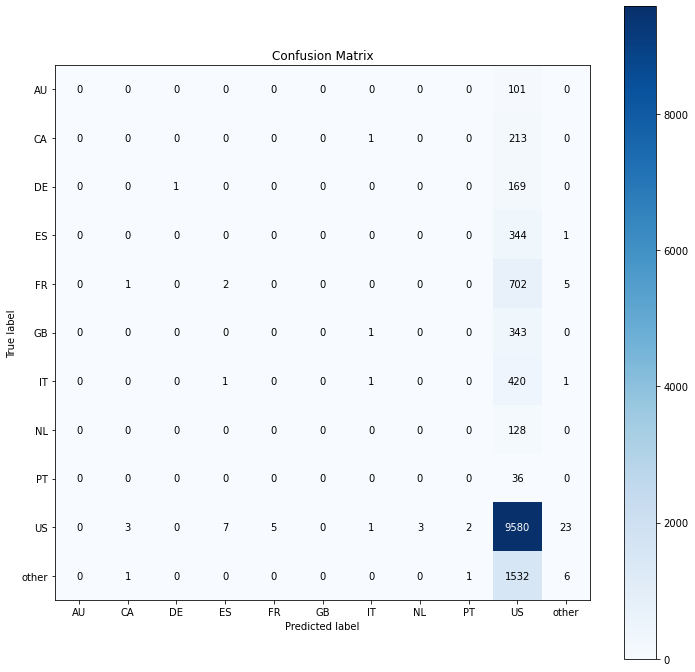

In [22]:
#Accuracy
acc_nn = m.accuracy_score( y_test_nn, y_hat_nn )
print('Accuracy :{}'.format(acc_nn))

# Balanced accuracy
balanced_accuracy_nn = m.balanced_accuracy_score(y_test_nn, y_hat_nn)
print('Balanced accuracy : {}'.format( balanced_accuracy_nn ))


# Kappa Metrics
kappa_nn = m.cohen_kappa_score(y_test_nn, y_hat_nn)
print('kappa score : {}'.format( kappa_nn ))

# classification report
print(m.classification_report( y_test_nn, y_hat_nn ))

#Confusion Matrix 
mt.plot_confusion_matrix( y_test_nn, y_hat_nn, normalize=False , figsize=(12,12) )


### 6.1.3 NN Performance - Cross Validation

In [26]:
# Generate k-fold
num_folds = 5 
kfold = ms.StratifiedKFold(n_splits=num_folds, shuffle=True ,random_state=32)
kfold.split( x_train, y_train )


balanced_acc_list = [] 
kappa_acc_list    = []

i = 1
for train_ix, val_ix in kfold.split(x_train,y_train):
    print('Fold Number : {}/{}'.format( i , num_folds ))
    # get fold
    x_train_fold  = x_train.iloc[train_ix]
    y_train_fold  = y_train.iloc[train_ix]
    
    x_val_fold    = x_train.iloc[val_ix]
    y_val_fold    = y_train.iloc[val_ix]
    
    # Target Definition
    
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform( y_train_fold.values.reshape( -1,1 ) ).toarray()

    
    # Model definition
    model = ml.Sequential()
    model.add( l.Dense( 256, input_dim=x_train.shape[1], activation='relu' ) )
    model.add( l.Dense( 11,  activation='softmax') )
    
    # Compile Model
    model.compile( loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])    
    
    
    # Trainig model 
    model.fit( x_train_fold, y_train_fold_nn, epochs=100, batch_size=32,verbose=0 )
    
    
    # Prediction
    pred_nn  = model.predict(x_val_fold)
    y_hat_nn = ohe.inverse_transform(pred_nn)
    
    
    #prepare data
    y_test_nn  = y_val_fold.to_numpy()
    y_hat_nn  = y_hat_nn.reshape( 1 , -1 )[0]
    
    # Metrics
    ## Balanced Accuracy
    balanced_acc_nn   =  m.balanced_accuracy_score( y_test_nn, y_hat_nn)
    balanced_acc_list.append(balanced_acc_nn) 
    ## Kappa Metrics
    kappa_acc_nn    =  m.cohen_kappa_score( y_test_nn, y_hat_nn)
    kappa_acc_list.append( kappa_acc_nn )
    
    
    i+=1

Fold Number : 1/5
Fold Number : 2/5
Fold Number : 3/5
Fold Number : 4/5
Fold Number : 5/5


In [64]:
print('Avg Balanced accuracy: {}  +/- {}'.format(np.round( np.mean( balanced_acc_list ),3),
                                                 np.round(np.std  ( balanced_acc_list ),4)))
print('Avg Kappa:             {}  +/- {}'.format( np.round ( np.mean ( kappa_acc_list ),3 ),
                                                  np.round ( np.std  ( kappa_acc_list ),3 ) ))

Avg Balanced accuracy: 0.092  +/- 0.0005
Avg Kappa:             0.004  +/- 0.002
